In [68]:
import pandas as pd

In [69]:
#Reading the data 

In [70]:
df = pd.read_csv('data_statistics.csv')

In [71]:
df.shape

(8523, 12)

In [72]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [73]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [74]:
#variable identification
#problem statement: Identify the outlet sales

In [75]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [76]:
#univariate analysis for continuous variable

In [77]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:ylabel='Frequency'>

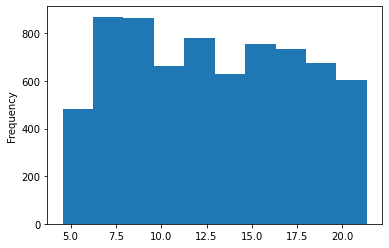

In [78]:
df['Item_Weight'].plot.hist()

<AxesSubplot:>

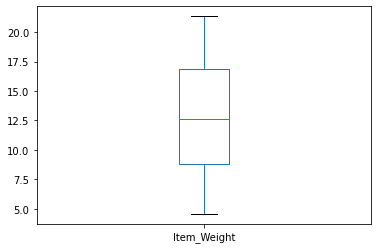

In [79]:
df['Item_Weight'].plot.box()

In [80]:
#Univariate analysis for categorial variables

In [81]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [82]:
df['Outlet_Size'].value_counts()/len(df['Outlet_Size'])

Medium    0.327702
Small     0.280183
High      0.109351
Name: Outlet_Size, dtype: float64

<AxesSubplot:>

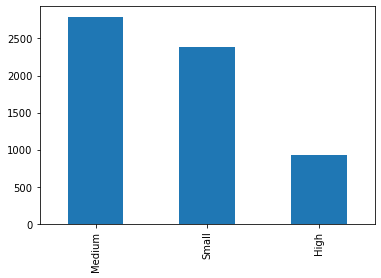

In [83]:
df['Outlet_Size'].value_counts().plot.bar()

<AxesSubplot:>

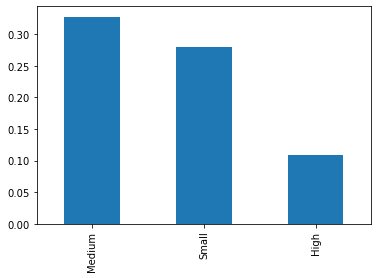

In [84]:
(df['Outlet_Size'].value_counts()/len(df['Outlet_Size'])).plot.bar()

In [85]:
#Bivariate analysis

In [86]:
#Continuous-Continuous variable: Scatterplot,Correlation

In [87]:
import matplotlib.pyplot as pt
%matplotlib inline

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Weight'>

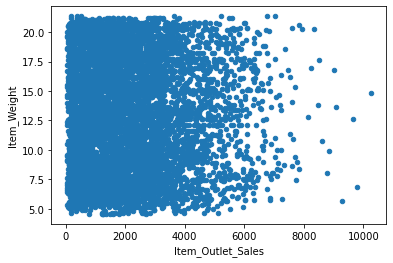

In [88]:
df.plot.scatter('Item_Outlet_Sales','Item_Weight') #no correlation

In [89]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [90]:
df['Item_Outlet_Sales'].corr(df['Item_MRP'])

0.5675744466569194

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_MRP'>

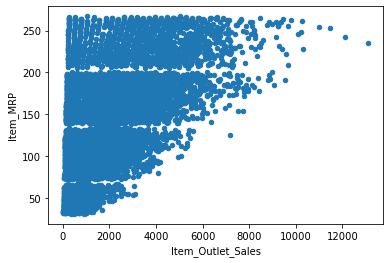

In [91]:
df.plot.scatter('Item_Outlet_Sales','Item_MRP')  #Mrp increases sale increase

In [92]:
#Categorial and Continuous variables-bar plot,Two sample t-test

<AxesSubplot:xlabel='Item_Type'>

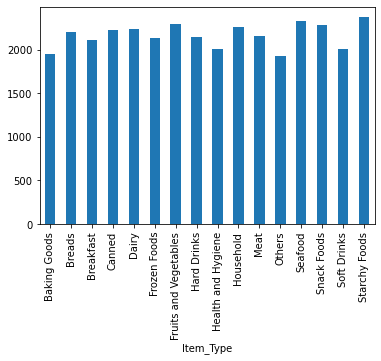

In [93]:
df.groupby('Item_Type')['Item_Outlet_Sales'].mean().plot.bar()

In [94]:
import scipy.stats
from scipy.stats import ttest_ind 

<AxesSubplot:xlabel='Outlet_Size'>

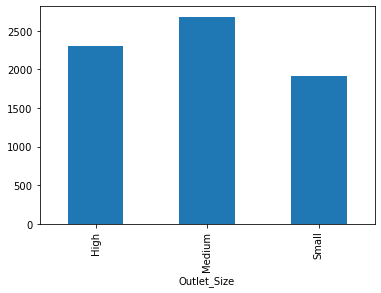

In [95]:
df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().plot.bar() #Medium size has high sales

In [96]:
High=df[df['Outlet_Size'] == 'High']

In [97]:
Medium = df[df['Outlet_Size'] == 'Medium']
Small = df[df['Outlet_Size'] == 'Small']

In [98]:
ttest_ind(High['Item_Outlet_Sales'],Medium['Item_Outlet_Sales'],nan_policy='omit')

Ttest_indResult(statistic=-5.681448368387827, pvalue=1.4379207875966472e-08)

In [99]:
ttest_ind(Small['Item_Outlet_Sales'],Medium['Item_Outlet_Sales'],nan_policy='omit')

Ttest_indResult(statistic=-15.914017752878614, pvalue=1.0406443846371512e-55)

In [100]:
#Categorial-Categorial variables - two way and chi-square test

In [101]:
pd.crosstab(df['Outlet_Type'],df['Outlet_Size']) #grocery store has sales in small size and supermarket type3 has medium size sales 

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,0,0,528
Supermarket Type1,932,930,1860
Supermarket Type2,0,928,0
Supermarket Type3,0,935,0


In [102]:
from scipy.stats import chi2_contingency

In [103]:
chi2_contingency(pd.crosstab(df['Outlet_Type'],df['Outlet_Size']))

(3734.861462225357,
 0.0,
 6,
 array([[  80.49991821,  241.24063471,  206.25944708],
        [ 567.46343857, 1700.56371667, 1453.97284476],
        [ 141.48470473,  423.99869131,  362.51660396],
        [ 142.55193849,  427.1969573 ,  365.2511042 ]]))

In [104]:
# Missing values 

In [105]:
#For continuous variable (Count)

In [106]:
df.shape

(8523, 12)

In [107]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [108]:
# For categorial variables

In [109]:
df.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [110]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [111]:
#row wise deletion

In [112]:
df.dropna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [113]:
df.dropna().isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [114]:
#row wise deletion if all values in row is null

In [115]:
df.dropna(how='all').isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [116]:
df.dropna(how='all').shape

(8523, 12)

In [117]:
#column wise deletion

In [118]:
df.dropna(axis=1)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket Type2,1845.5976


In [119]:
df.dropna(axis=1,how='all').shape

(8523, 12)

In [120]:
#filling the missing values with 0

In [121]:
df.fillna(0)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,0,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [122]:
df['Item_Weight'].fillna(0)

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [123]:
#filling the missing values with mean

In [124]:
df['Item_Weight'].fillna(df['Item_Weight'])

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [125]:
#Treating outliers

In [126]:
#Univariate outliers- boxplot

<AxesSubplot:>

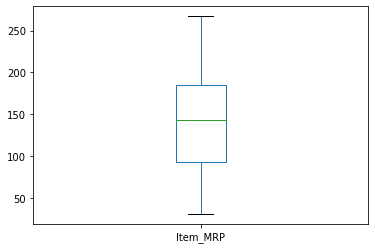

In [127]:
df['Item_MRP'].plot.box()

<AxesSubplot:>

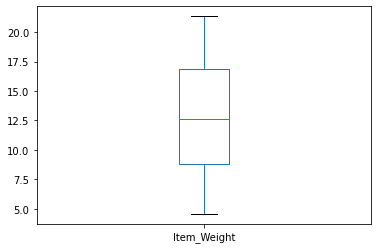

In [128]:
df['Item_Weight'].plot.box()

<AxesSubplot:>

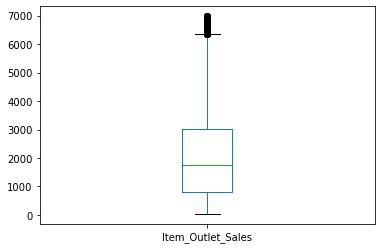

In [133]:
df['Item_Outlet_Sales'].plot.box()

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Weight'>

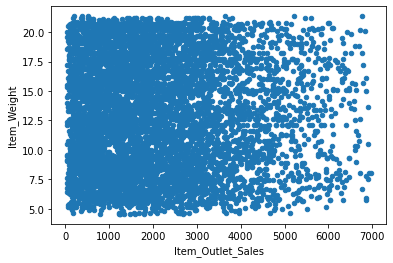

In [134]:
df.plot.scatter('Item_Outlet_Sales','Item_Weight')

In [131]:
#removing and replacing outliers

In [132]:
df=df[df['Item_Outlet_Sales'] < 7000]

In [135]:
# (or) df.loc[df['field']<7000,'field'] = np.mean(df['field'])

In [136]:
#variable transformation

In [137]:
# log method,square method & power method

<AxesSubplot:ylabel='Frequency'>

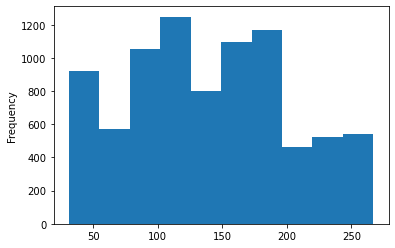

In [144]:
df['Item_MRP'].plot.hist()

In [139]:
import numpy as np

<AxesSubplot:ylabel='Frequency'>

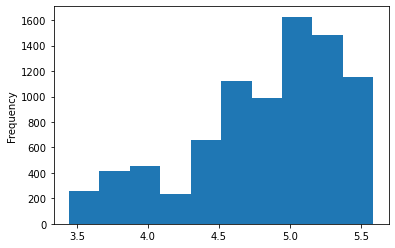

In [145]:
#np.log(df['Item_MRP']).plot.hist()

<AxesSubplot:ylabel='Frequency'>

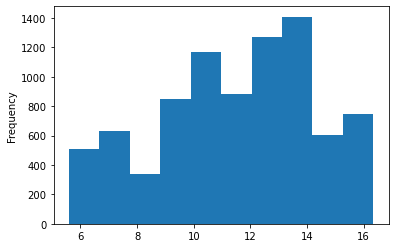

In [146]:
np.sqrt(df['Item_MRP']).plot.hist()

<AxesSubplot:ylabel='Frequency'>

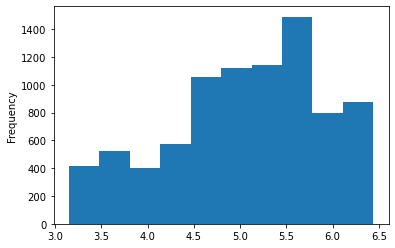

In [147]:
#np.power(df['Item_MRP'],1/3).plot.hist()

In [148]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<AxesSubplot:ylabel='Frequency'>

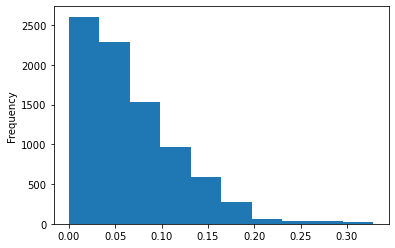

In [149]:
df['Item_Visibility'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

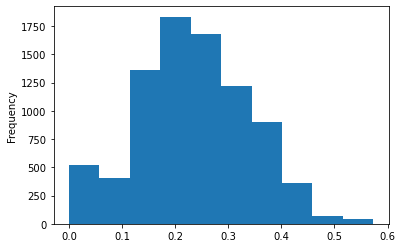

In [151]:
np.sqrt(df['Item_Visibility']).plot.hist()

<AxesSubplot:ylabel='Frequency'>

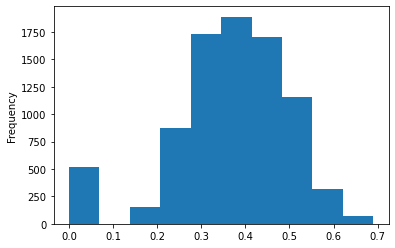

In [152]:
np.power(df['Item_Visibility'],1/3).plot.hist()

<AxesSubplot:ylabel='Frequency'>

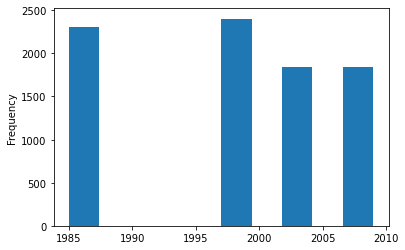

In [153]:
df['Outlet_Establishment_Year'].plot.hist()


In [158]:
#binning method

In [154]:
bins=[1985,2000,2010]
group=['1985-2000','2000-2010']

In [155]:
df['Year_Type']=pd.cut(df['Outlet_Establishment_Year'],bins,labels=group)

In [156]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Year_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1985-2000
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2000-2010
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1985-2000
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,1985-2000
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1985-2000


In [157]:
df['Year_Type'].dtypes

CategoricalDtype(categories=['1985-2000', '2000-2010'], ordered=True)